In [63]:
import sys
sys.path.insert(0,'/u/f/fbarone/Documents/TWO-NN')
import os
import numpy as np
import matplotlib.pyplot as plt
import id2nn

In [64]:
# Decoder block analysis

for act in os.listdir('./activations'):
    act_path = os.path.join('activations', act)
    print(act_path)
    with open(act_path, 'rb') as f:
        features = np.load(f)

    np.random.seed(10)

    # dim, mu, mu_cs = two_nn_id(data, 0.9)

    blocks_dim, blocks_dim_std, blocks_size, d_mat2 = id2nn.two_nn_block_analysis(features, .9, shuffle = True)

    # print(len(blocks_dim))
    # # print(len(blocks_dim_std))

    block_path = os.path.join('activations', 'block_' + act)
    print(block_path)
    with open(block_path, 'w') as file: 
        blocks_dim = np.array(blocks_dim)[:,None]
        blocks_dim_std = np.array(blocks_dim_std)[:,None]
        blocks = np.hstack((blocks_dim, blocks_dim_std))
        np.savetxt(file, blocks)


activations/dec_1.pkl


  0%|          | 0/1600 [00:00<?, ?it/s]

Start shuffle..
Finished shuffle
Start dist_mat


  0%|          | 0/20 [00:00<?, ?it/s]

Finished dist_mat


100%|██████████| 20/20 [00:01<00:00, 16.96it/s]


activations/block_dec_1.pkl
activations/dec_2.pkl
Start shuffle..
Finished shuffle
Start dist_mat


  0%|          | 0/20 [00:00<?, ?it/s]

Finished dist_mat


100%|██████████| 20/20 [00:01<00:00, 16.69it/s]


activations/block_dec_2.pkl
activations/dec_3.pkl
Start shuffle..
Finished shuffle
Start dist_mat


  0%|          | 0/20 [00:00<?, ?it/s]

Finished dist_mat


100%|██████████| 20/20 [00:01<00:00, 15.65it/s]


activations/block_dec_3.pkl
activations/dec_4.pkl
Start shuffle..
Finished shuffle
Start dist_mat


  0%|          | 0/20 [00:00<?, ?it/s]

Finished dist_mat


100%|██████████| 20/20 [00:01<00:00, 15.49it/s]


activations/block_dec_4.pkl
activations/dec_5.pkl
Start shuffle..
Finished shuffle
Start dist_mat


  0%|          | 0/20 [00:00<?, ?it/s]

Finished dist_mat


100%|██████████| 20/20 [00:01<00:00, 16.83it/s]


activations/block_dec_5.pkl
activations/pca.pkl


  0%|          | 6/1600 [00:00<00:28, 56.92it/s]

Start shuffle..
Finished shuffle
Start dist_mat


  0%|          | 0/20 [00:00<?, ?it/s]

Finished dist_mat


100%|██████████| 20/20 [00:01<00:00, 17.13it/s]

activations/block_pca.pkl


In [69]:
# Encoder block activation

for act in os.listdir('/u/f/fbarone/Documents/patches/cae/activations/encoder'):
    act_path = os.path.join('activations/encoder', act)
    print(act_path)
    with open(act_path, 'rb') as f:
        features = np.load(f)
        

    np.random.seed(10)

    # dim, mu, mu_cs = two_nn_id(data, 0.9)

    blocks_dim, blocks_dim_std, blocks_size, d_mat2 = id2nn.two_nn_block_analysis(features, .9, shuffle = True)

    # print(len(blocks_dim))
    # # print(len(blocks_dim_std))

    block_path = os.path.join('activations', 'block_' + act)
    print(block_path)
    with open(block_path, 'w') as file: 
        blocks_dim = np.array(blocks_dim)[:,None]
        blocks_dim_std = np.array(blocks_dim_std)[:,None]
        blocks = np.hstack((blocks_dim, blocks_dim_std))
        np.savetxt(file, blocks)

activations/encoder/enc_1.pkl
Start shuffle..
Finished shuffle
Start dist_mat


  0%|          | 0/20 [00:00<?, ?it/s]

Finished dist_mat


100%|██████████| 20/20 [00:01<00:00, 17.08it/s]


activations/block_enc_1.pkl
activations/encoder/enc_2.pkl
Start shuffle..
Finished shuffle
Start dist_mat


  0%|          | 0/20 [00:00<?, ?it/s]

Finished dist_mat


100%|██████████| 20/20 [00:01<00:00, 15.77it/s]


activations/block_enc_2.pkl
activations/encoder/enc_3.pkl
Start shuffle..
Finished shuffle
Start dist_mat


  0%|          | 0/20 [00:00<?, ?it/s]

Finished dist_mat


100%|██████████| 20/20 [00:01<00:00, 17.05it/s]


activations/block_enc_3.pkl
activations/encoder/enc_4.pkl
Start shuffle..
Finished shuffle
Start dist_mat


  0%|          | 0/20 [00:00<?, ?it/s]

Finished dist_mat


100%|██████████| 20/20 [00:01<00:00, 16.59it/s]


activations/block_enc_4.pkl
activations/encoder/enc_5.pkl


  0%|          | 0/1600 [00:00<?, ?it/s]

Start shuffle..
Finished shuffle
Start dist_mat


  0%|          | 0/20 [00:00<?, ?it/s]

Finished dist_mat


100%|██████████| 20/20 [00:01<00:00, 15.98it/s]

activations/block_enc_5.pkl


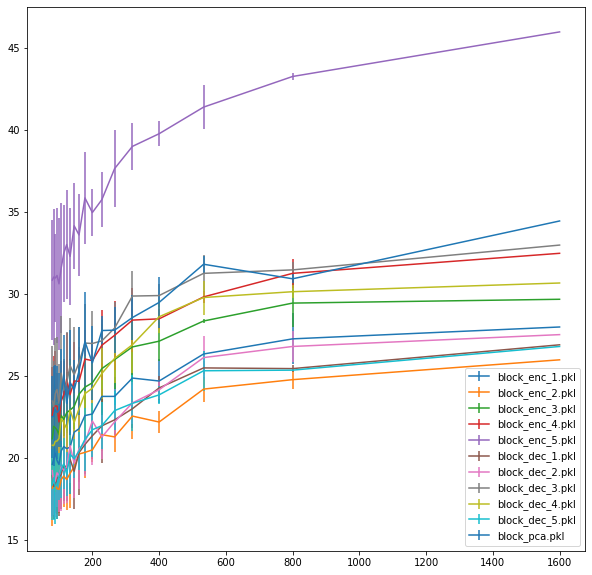

In [70]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
for act in os.listdir('./activations'):
    if 'block' in act:
        with open('./activations/' + act, 'r') as f:
            blocks = np.loadtxt(f)
#             ax.plot(blocks_size, blocks[:,0], "r.-")
            ax.errorbar(blocks_size, blocks[:,0], yerr = np.array(blocks[:,1]), label = act)
    
ax.legend()
        

In [95]:
enc_id = [] 
dec_id = []
pca_id = []
print(os.listdir('./activations'))
for act in os.listdir('./activations'):
    if 'block' in act:
        with open('./activations/' + act, 'r') as f:
            blocks = np.loadtxt(f)
            if 'enc' in act:
                print(blocks[:3,0])
                enc_id.append(np.mean(blocks[:3,0]))
    #             ax.plot(blocks_size, blocks[:,0], "r.-")
            if 'dec' in act:
                dec_id.append(np.mean(blocks[:3,0]))
#             ax.errorbar(blocks_size, blocks[:,0], yerr = np.array(blocks[:,1]), label = act)
            if 'pca' in act:
                print(blocks[:3,0])
                pca_id.append(np.mean(blocks[:3,0]))
    #       
            

['encoder', 'block_enc_1.pkl', 'block_enc_2.pkl', 'block_enc_3.pkl', 'block_enc_4.pkl', 'block_enc_5.pkl', 'block_dec_1.pkl', 'block_dec_2.pkl', 'block_dec_3.pkl', 'block_dec_4.pkl', 'block_dec_5.pkl', 'block_pca.pkl', 'decoder']
[27.99895247 27.27656463 26.35545061]
[25.99984182 24.79189439 24.21690098]
[29.68726237 29.45511134 28.36417184]
[32.48635665 31.26666227 29.83288275]
[45.9695551  43.25547589 41.38990146]
[34.45555224 30.93449571 31.82057681]


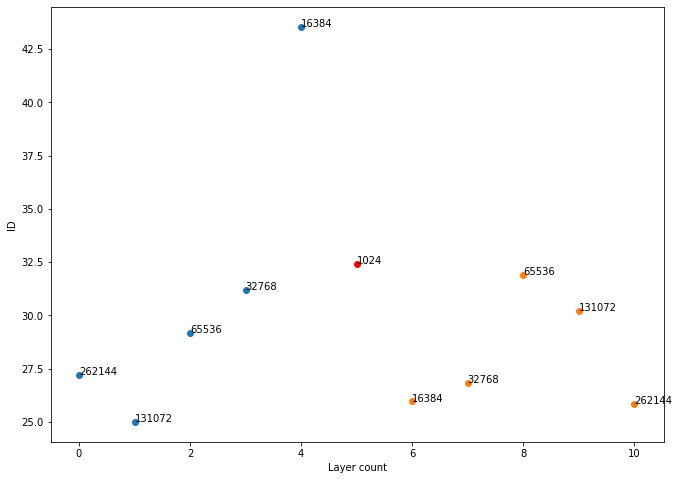

In [110]:
enc_x = np.arange(len(enc_id))
pca_x = np.arange(len(enc_id), len(enc_id)+1 )
dec_x = np.arange(len(enc_id)+1,len(enc_id) + len(dec_id) + 1)
plt.scatter(enc_x, np.array(enc_id))
plt.scatter(dec_x, np.array(dec_id))
plt.scatter(pca_x, pca_id, c='r')
plt.xlabel('Layer count')
plt.ylabel('ID')

enc_txt = ['262144', '131072', '65536', '32768', '16384']
pca_txt = ['1024']
dec_txt = ['16384', '32768', '65536', '131072','262144']

for i, txt in enumerate(enc_txt):
    plt.annotate(txt, (enc_x[i], enc_id[i]))
    
for i, txt in enumerate(dec_txt):
    plt.annotate(txt, (dec_x[i], dec_id[i]))

for i, txt in enumerate(pca_txt):
    plt.annotate(txt, (pca_x[i], pca_id[i]))

fig = plt.gcf()
fig.set_size_inches(11,8)

In [ ]:
enc_x = np.arange(len(enc_id))
pca_x = np.arange(len(enc_id), len(enc_id)+1 )
dec_x = np.arange(len(enc_id)+1,len(enc_id) + len(dec_id) + 1)
plt.plot(enc_x, np.array(enc_id), '-o')
plt.plot(dec_x, np.array(dec_id), '-o')
plt.plot(pca_x, pca_id, '-o', c='r')
plt.xlabel('Layer count')
plt.ylabel('ID')

enc_txt = ['262144', '131072', '65536', '32768', '16384']
pca_txt = ['1024']
dec_txt = ['16384', '32768', '65536', '131072','262144']

for i, txt in enumerate(enc_txt):
    plt.annotate(txt, (enc_x[i], enc_id[i]))
    
for i, txt in enumerate(dec_txt):
    plt.annotate(txt, (dec_x[i], dec_id[i]))

for i, txt in enumerate(pca_txt):
    plt.annotate(txt, (pca_x[i], pca_id[i]))
